#Importing Data & Libraries


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import norm
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew, kurtosis
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dats502/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df = df.drop(columns=['id']) #The id column has nothing to do with data.

In [6]:
df = df.fillna(df.mean())

<ipython-input-6-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [7]:
df_numerical=df[['age','avg_glucose_level','bmi']]
df_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                       'smoking_status', 'stroke']]
df_numerical.head()


,age,avg_glucose_level,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000


In [8]:
df_categorical.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1


#Data Representation

In [9]:
# Skewness and kurtosis
s_k=[]
for i in df_numerical.columns:
    s_k.append([i,df_numerical[i].skew(),df_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.137059,-0.991010
1,avg_glucose_level,1.572284,1.680479
2,bmi,1.076716,3.623061


Skewness (Stroke 0): -0.09
Kurtosis (Stroke 0): -0.98
Skewness (Stroke 1): -1.35
Kurtosis (Stroke 1): 3.02


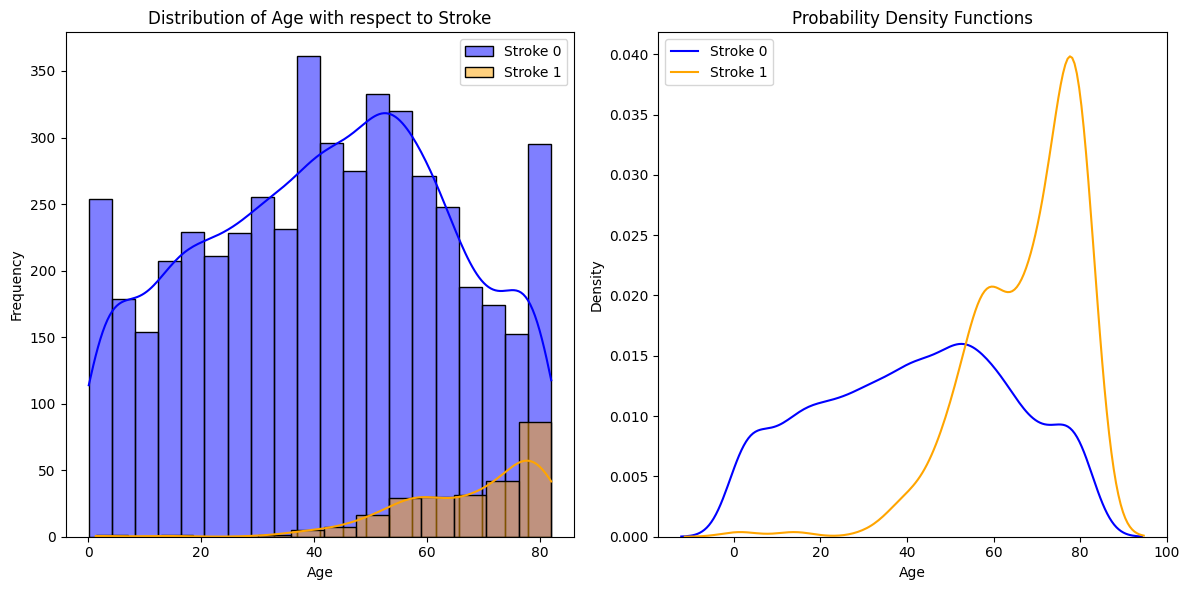

In [10]:
# Separate data based on stroke
stroke_1 = df[df['stroke'] == 1]['age']
stroke_0 = df[df['stroke'] == 0]['age']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(stroke_0, kde=True, color='blue', label='Stroke 0')
sns.histplot(stroke_1, kde=True, color='orange', label='Stroke 1')
plt.title('Distribution of Age with respect to Stroke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Plot probability density functions
plt.subplot(1, 2, 2)
sns.kdeplot(stroke_0, color='blue', label='Stroke 0')
sns.kdeplot(stroke_1, color='orange', label='Stroke 1')
plt.title('Probability Density Functions')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Display skewness and kurtosis
print(f"Skewness (Stroke 0): {skew(stroke_0):.2f}")
print(f"Kurtosis (Stroke 0): {kurtosis(stroke_0):.2f}")
print(f"Skewness (Stroke 1): {skew(stroke_1):.2f}")
print(f"Kurtosis (Stroke 1): {kurtosis(stroke_1):.2f}")

plt.tight_layout()
plt.show()

Skewness (Stroke 0): 1.09
Kurtosis (Stroke 0): 3.62
Skewness (Stroke 1): 1.08
Kurtosis (Stroke 1): 2.06


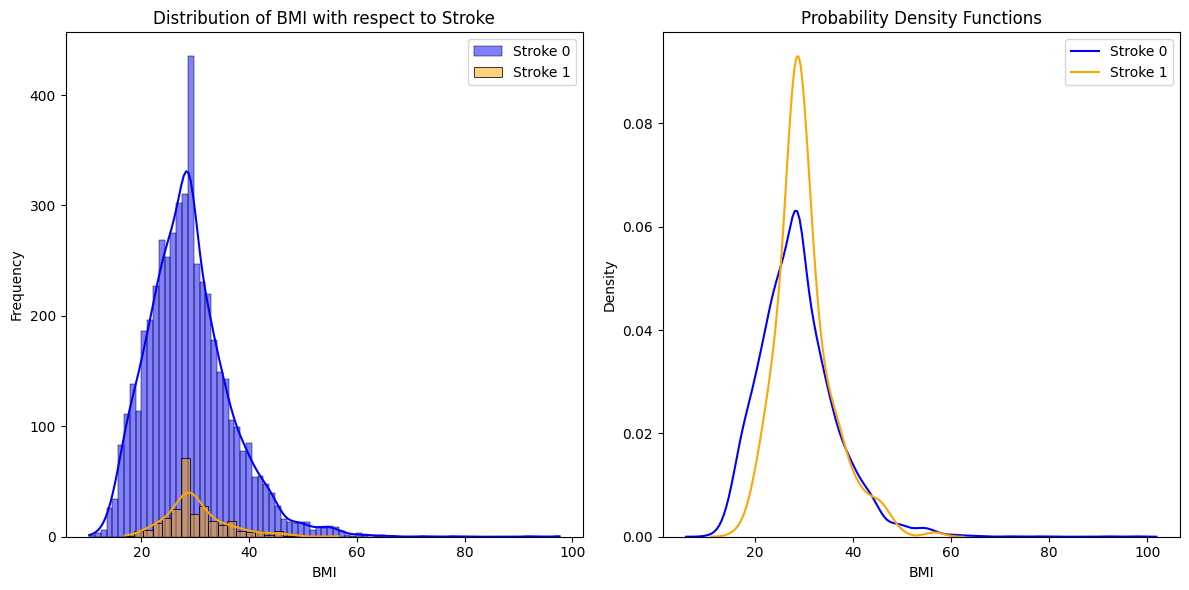

In [11]:
# Separate data based on stroke
stroke_1 = df[df['stroke'] == 1]['bmi']
stroke_0 = df[df['stroke'] == 0]['bmi']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(stroke_0, kde=True, color='blue', label='Stroke 0')
sns.histplot(stroke_1, kde=True, color='orange', label='Stroke 1')
plt.title('Distribution of BMI with respect to Stroke')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

# Plot probability density functions
plt.subplot(1, 2, 2)
sns.kdeplot(stroke_0, color='blue', label='Stroke 0')
sns.kdeplot(stroke_1, color='orange', label='Stroke 1')
plt.title('Probability Density Functions')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()

# Display skewness and kurtosis
print(f"Skewness (Stroke 0): {skew(stroke_0):.2f}")
print(f"Kurtosis (Stroke 0): {kurtosis(stroke_0):.2f}")
print(f"Skewness (Stroke 1): {skew(stroke_1):.2f}")
print(f"Kurtosis (Stroke 1): {kurtosis(stroke_1):.2f}")

plt.tight_layout()
plt.show()

Skewness (Stroke 0): 1.64
Kurtosis (Stroke 0): 2.01
Skewness (Stroke 1): 0.55
Kurtosis (Stroke 1): -1.22


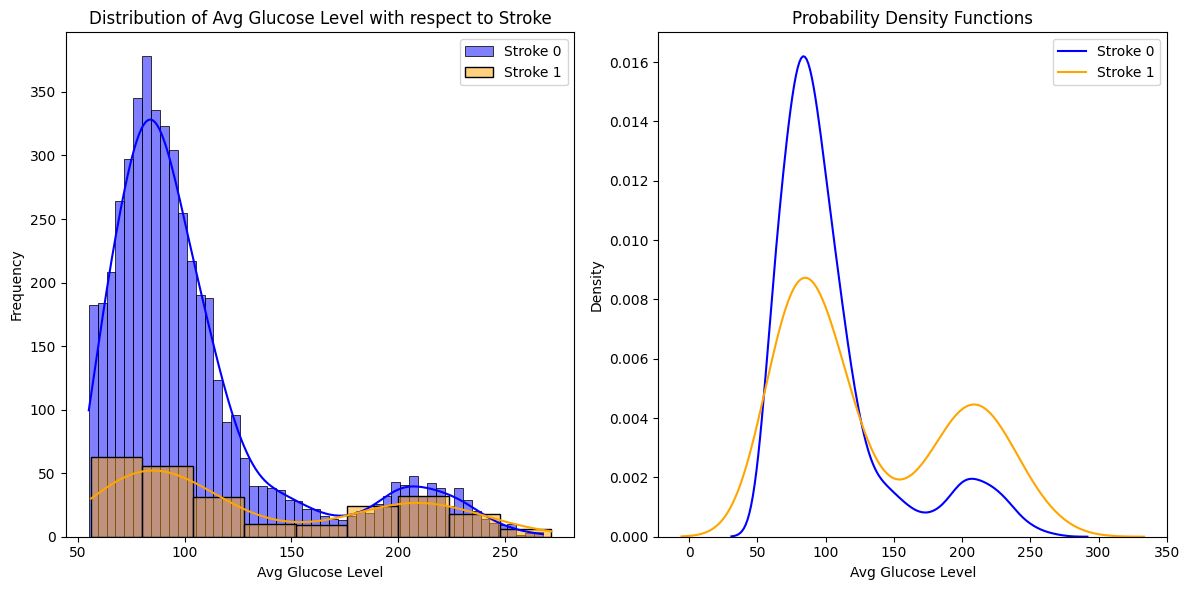

In [12]:

# Separate data based on stroke
stroke_1 = df[df['stroke'] == 1]['avg_glucose_level']
stroke_0 = df[df['stroke'] == 0]['avg_glucose_level']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(stroke_0, kde=True, color='blue', label='Stroke 0')
sns.histplot(stroke_1, kde=True, color='orange', label='Stroke 1')
plt.title('Distribution of Avg Glucose Level with respect to Stroke')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.legend()

# Plot probability density functions
plt.subplot(1, 2, 2)
sns.kdeplot(stroke_0, color='blue', label='Stroke 0')
sns.kdeplot(stroke_1, color='orange', label='Stroke 1')
plt.title('Probability Density Functions')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Density')
plt.legend()

# Display skewness and kurtosis
print(f"Skewness (Stroke 0): {skew(stroke_0):.2f}")
print(f"Kurtosis (Stroke 0): {kurtosis(stroke_0):.2f}")
print(f"Skewness (Stroke 1): {skew(stroke_1):.2f}")
print(f"Kurtosis (Stroke 1): {kurtosis(stroke_1):.2f}")

plt.tight_layout()
plt.show()

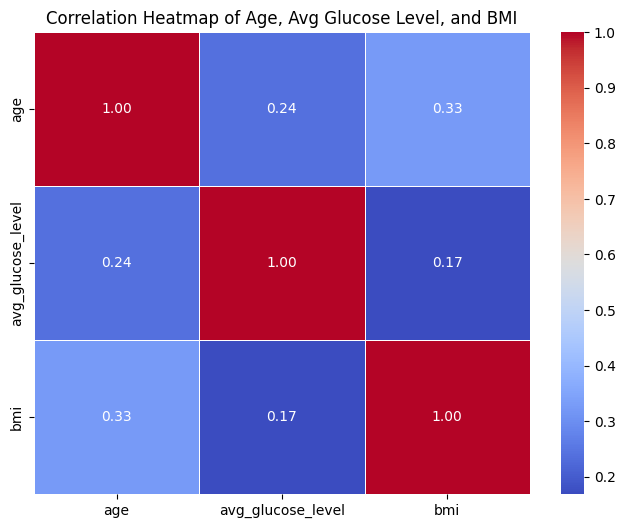

In [13]:
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Age, Avg Glucose Level, and BMI')
plt.show()

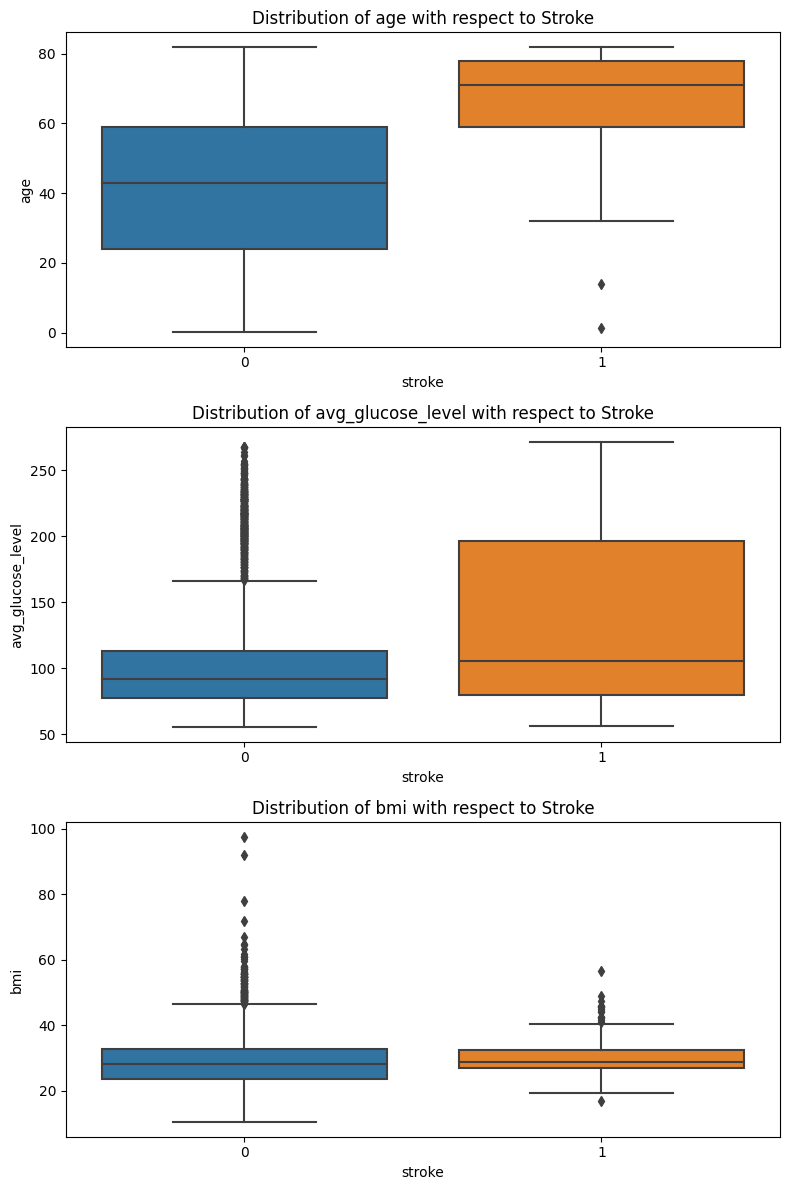

In [14]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Loop through each numerical column and create box plots
for i, column in enumerate(['age', 'avg_glucose_level', 'bmi']):
    sns.boxplot(x='stroke', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} with respect to Stroke')

# Adjust layout
plt.tight_layout()
plt.show()

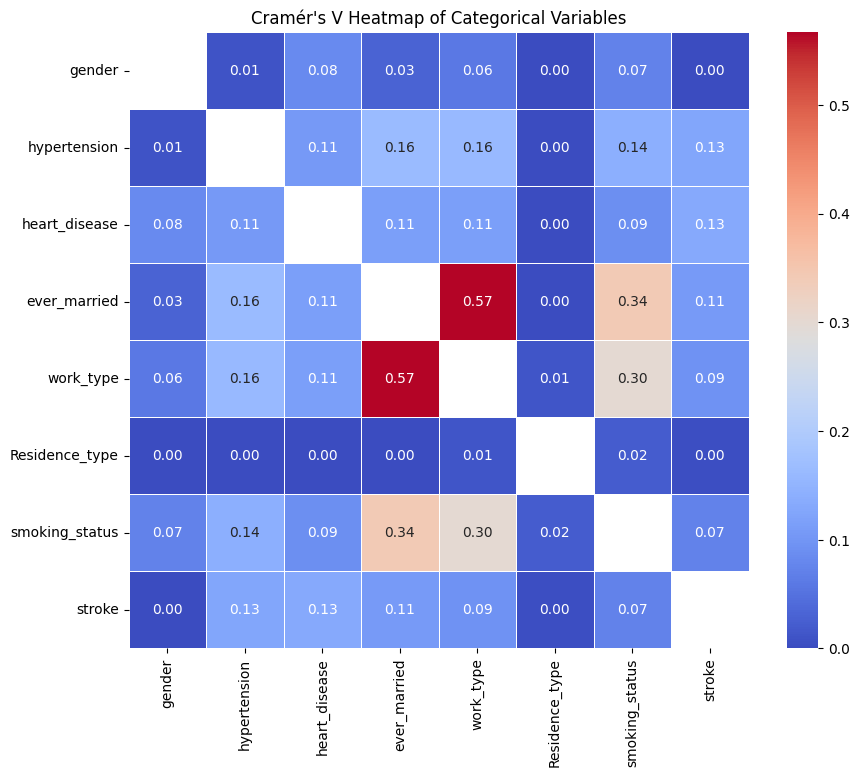

In [15]:
def cramers_v(i, j):
    confusion_matrix = pd.crosstab(i, j)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

corr_matrix = pd.DataFrame(index=df_categorical.columns, columns=df_categorical.columns)
for i in df_categorical.columns:
    for j in df_categorical.columns:
        if i != j:
            corr_matrix.loc[i, j] = cramers_v(df_categorical[i], df_categorical[j])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Cramér\'s V Heatmap of Categorical Variables')
plt.show()

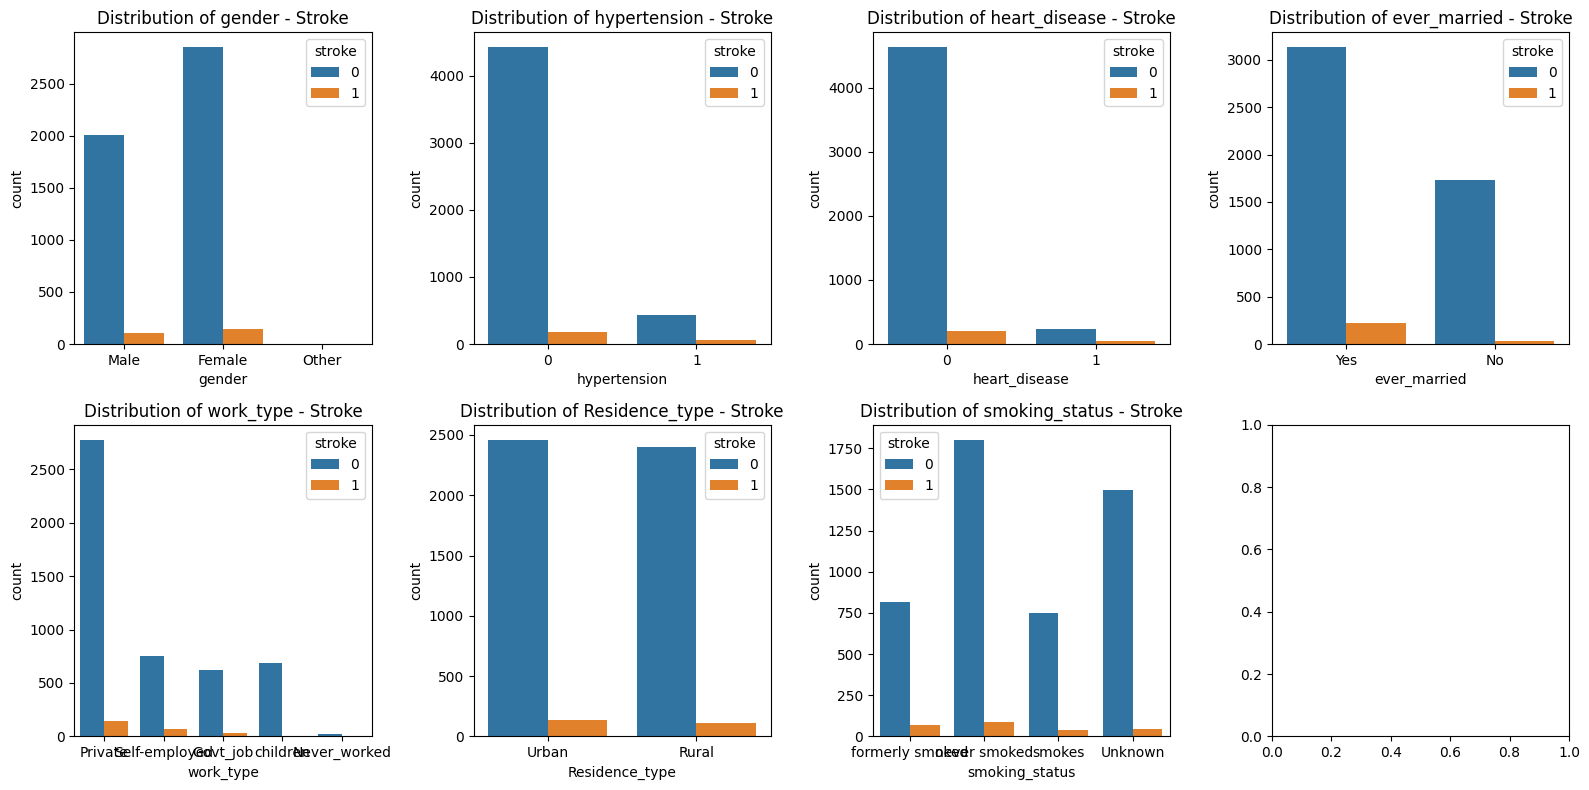

In [45]:

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

#'gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status', 'stroke'

# Loop through each column and create count plots
for i, column in enumerate(df_categorical.columns[:-1]):
    sns.countplot(x=column, hue='stroke', data=df_categorical, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} - Stroke')

# Adjust layout
plt.tight_layout()
plt.show()

#**Data Preparation**

In [17]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
df["gender"]=df["gender"].apply(lambda x : 1 if x=="Female" else 0)
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,1,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [18]:
df_dummies = df[['smoking_status','work_type']]
df_dummies=pd.get_dummies(df_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

In [19]:
X = df.drop(columns=['stroke'])
y = df['stroke']

# **Model Training**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [21]:
unique_classes = np.unique(y_train)

In [22]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train)
class_weight_dict = dict(zip(unique_classes, class_weights))

print("Class Weights:")
print(class_weight_dict)

Class Weights:
{0: 0.5265327150953117, 1: 9.922330097087379}


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Random Forest

In [24]:
model = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=40)


In [25]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.5265327150953117,
                                     1: 9.922330097087379},
                       random_state=40)

In [26]:
y_pred = model.predict(X_test)


In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [28]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.952054794520548
Confusion Matrix:
[[973   6]
 [ 43   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.95      0.93      1022



#Logistic Regression

In [29]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.9579256360078278

Confusion Matrix:
[[979   0]
 [ 43   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



# **Decision Tree**

In [33]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [36]:
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.9178082191780822

Confusion Matrix:
[[931  48]
 [ 36   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       979
           1       0.13      0.16      0.14        43

    accuracy                           0.92      1022
   macro avg       0.55      0.56      0.55      1022
weighted avg       0.93      0.92      0.92      1022

